In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

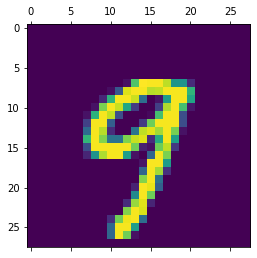

In [7]:
plt.matshow(X_train[45])

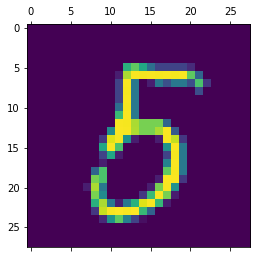

In [8]:
plt.matshow(X_test[45])

In [9]:
y_train[45]

9

In [10]:
y_test[45]

5

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train_flat = X_train.reshape(len(X_train), 28*28 )
X_test_flat = X_test.reshape(len(X_test), 28*28 )

In [13]:
sc = StandardScaler()
strain = sc.fit_transform(X_train_flat)
stest = sc.fit_transform(X_test_flat)

In [139]:
X_train_flat[0].shape

(784,)

In [149]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(strain, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4778 - accuracy: 0.8662
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3224 - accuracy: 0.9096
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2990 - accuracy: 0.9157
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.9193
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.9210


In [32]:
model.evaluate(stest, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.9222


[0.34067144989967346, 0.9222000241279602]

In [36]:
pred = model.predict(stest)

In [39]:
pred[45]

array([0.89676946, 0.05311248, 0.31424817, 0.9901271 , 0.65561336,
       0.99990344, 0.38166744, 0.01052219, 0.9901105 , 0.95408964],
      dtype=float32)

In [42]:
np.argmax(pred[3000])

6

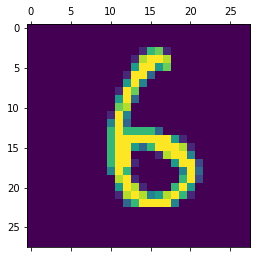

In [43]:
plt.matshow(X_test[3000])

In [44]:
y_pred_label = [np.argmax(i) for i in pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    2,    2,    3,   11,   11,    3,    1,    0],
       [   0, 1112,    4,    2,    0,    1,    4,    1,   11,    0],
       [  11,   11,  924,   16,    8,    4,   15,    8,   32,    3],
       [   4,    4,   21,  906,    1,   35,    4,    9,   19,    7],
       [   1,    3,    5,    2,  915,    0,   13,    3,    6,   34],
       [   6,    2,    0,   33,    7,  780,   16,    7,   37,    4],
       [  10,    4,    5,    1,    6,   17,  912,    1,    2,    0],
       [   4,   14,   23,   10,    6,    2,    0,  933,    0,   36],
       [   9,   10,    6,   22,   10,   21,   10,   13,  860,   13],
       [  10,    9,    1,   10,   23,    7,    0,   18,    7,  924]])>

Text(69.0, 0.5, 'Truth')

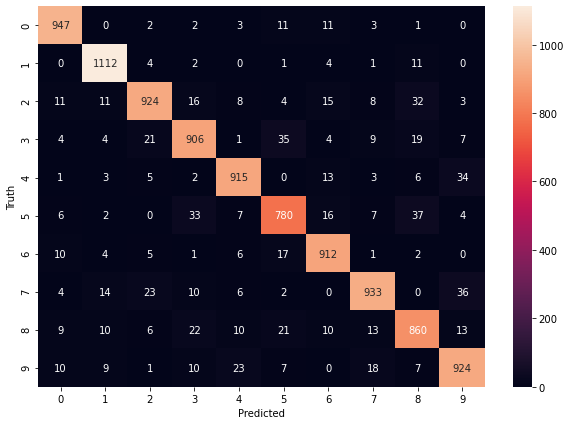

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(strain, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2404 - accuracy: 0.9318
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1119 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9862


In [49]:
model.evaluate(stest, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1424 - accuracy: 0.9714


[0.14239896833896637, 0.9714000225067139]

In [51]:
pred = model.predict(stest)

In [52]:
y_pred_label = [np.argmax(i) for i in pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    1,    1,    1,    4,    4,    3,    0],
       [   0, 1123,    5,    1,    0,    1,    1,    1,    3,    0],
       [   5,    1,  999,    1,    2,    0,    3,    6,   13,    2],
       [   1,    1,    8,  981,    0,    8,    1,    3,    3,    4],
       [   0,    0,    8,    1,  966,    0,    2,    1,    1,    3],
       [   3,    0,    0,    8,    2,  864,    5,    2,    4,    4],
       [   2,    2,   16,    1,   35,   13,  888,    0,    1,    0],
       [   0,    6,   13,    9,    3,    1,    0,  987,    3,    6],
       [   1,    0,    5,    5,    6,    5,    3,    5,  941,    3],
       [   2,    2,    0,    4,   27,    4,    1,    8,    4,  957]])>

Text(69.0, 0.5, 'Truth')

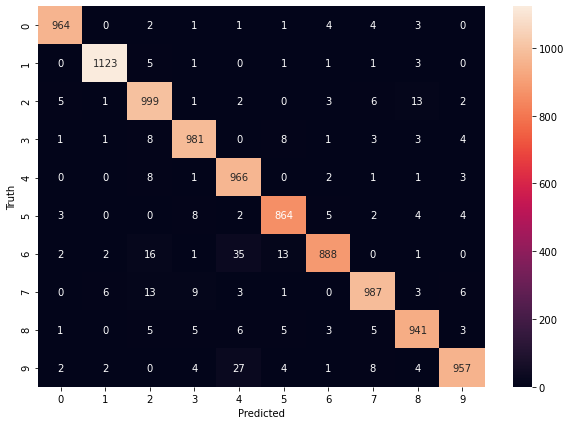

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [145]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(strain, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9320
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0747 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0564 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9864


In [150]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 32696), started 0:10:40 ago. (Use '!kill 32696' to kill it.)

In [25]:
import math

In [26]:
def sigmoid(x):
    return 1/(1+ math.exp(-x))

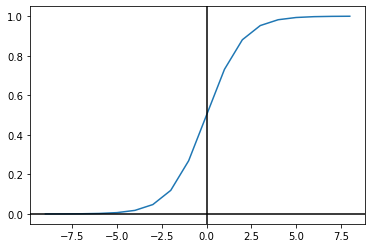

In [29]:
y = [] 
x = [] 
for a in range (-9, 9):
    x.append(a)
    y.append(sigmoid(a))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [61]:
sigmoid(10)

0.9999546021312976

In [64]:
sigmoid(2)

0.8807970779778823

In [63]:
sigmoid(1)

0.7310585786300049

In [30]:
def tanh(x):
    return (math.exp(x) - math.exp(-x))/(math.exp(x) + math.exp(-x))

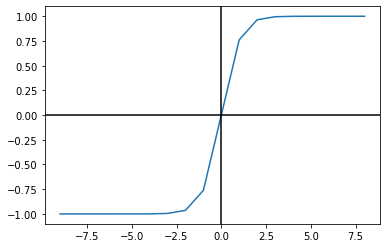

In [31]:
y = [] 
x = [] 
for a in range (-9, 9):
    x.append(a)
    y.append(tanh(a))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [67]:
tanh(-3)

-0.9950547536867306

In [68]:
tanh(0)

0.0

In [32]:
def relu(x):
    return max(0,x)

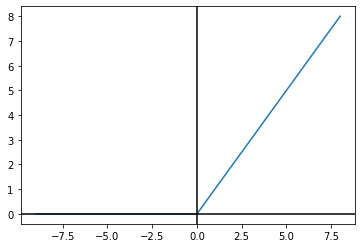

In [33]:
y = [] 
x = [] 
for a in range (-9, 9):
    x.append(a)
    y.append(relu(a))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [71]:
relu(-39393)

0

In [2]:
def leaky_relu(x):
    return max(0.1*x, x)

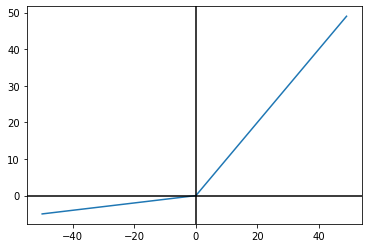

In [22]:
y = [] 
x = [] 
for a in range (-50, 50):
    x.append(a)
    y.append(leaky_relu(a))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [7]:
leaky_relu(-2)

-0.2

In [41]:
def elu(x):
    if x < 0:
        a = 0.1*(math.exp(x) - 1)
    else:
        a = x
    return a

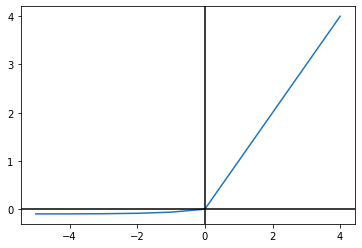

In [43]:
y = [] 
x = [] 
for a in range (-5, 5):
    x.append(a)
    y.append(elu(a))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [47]:
a = 1.6732632423543772848170429916717
λ = 1.0507009873554804934193349852946

In [48]:
def selu(x):
    if x < 0:
        b =  λ * (a*math.exp(x) - a)
    else:
        b = x * λ
    return b

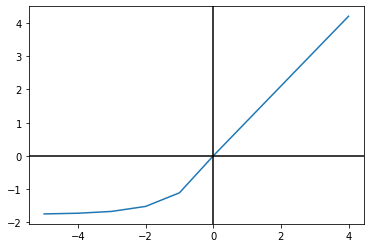

In [49]:
y = [] 
x = [] 
for b in range (-5, 5):
    x.append(b)
    y.append(selu(b))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [56]:
def gelu(x):
    return 0.5*x * ( 1 + math.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * x**3)) )

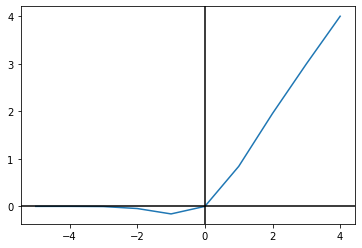

In [57]:
y = [] 
x = [] 
for b in range (-5, 5):
    x.append(b)
    y.append(gelu(b))
plt.plot(x, y)
plt.show
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

In [74]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [75]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [76]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0


In [132]:
input_shape = (28, 28, 1)
train_images_scaled = tf.expand_dims(train_images_scaled, axis=-1)
test_images_scaled = tf.expand_dims(train_images_scaled, axis=-1)

In [146]:
def build_cnn(activation,
              dropout_rate,
              optimizer):
    model = Sequential()
    
    if(activation == 'selu'):
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape,
                  kernel_initializer='lecun_normal'))
        model.add(Conv2D(64, (3, 3), activation=activation, 
                         kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(AlphaDropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(Dense(10, activation='sigmoid'))
    else:
        model.add(Conv2D(32, kernel_size=(3, 3),
                  activation=activation,
                  input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=activation))
        model.add(Dense(10, activation='sigmoid'))
    
    model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [147]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)             

In [151]:
# Add the GELU function to Keras
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

# Add leaky-relu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

act_func = ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu', 'gelu', 'tanh' ]

In [152]:
result = []

for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    
    model = build_cnn(activation=activation,
                      dropout_rate=0.2,
                      optimizer='adam') 
    
    history = model.fit(train_images_scaled, train_labels,
          validation_split=0.20,
          batch_size=32, # 128 is faster, but less accurate. 16/32 recommended
          epochs=10,
          verbose=1,
          validation_data=(test_images_scaled, test_labels))
    
    result.append(history)
    
    K.clear_session()
    del model

print(result)


Training with -->sigmoid<-- activation function

Epoch 1/10
1500/1500 [==============================] - 105s 69ms/step - loss: 1.7720 - accuracy: 0.3391 - val_loss: 0.4978 - val_accuracy: 0.8133
Epoch 2/10
1500/1500 [==============================] - 114s 76ms/step - loss: 0.4809 - accuracy: 0.8201 - val_loss: 0.4361 - val_accuracy: 0.8396
Epoch 3/10
1500/1500 [==============================] - 112s 75ms/step - loss: 0.4300 - accuracy: 0.8433 - val_loss: 0.3911 - val_accuracy: 0.8533
Epoch 4/10
1500/1500 [==============================] - 114s 76ms/step - loss: 0.3817 - accuracy: 0.8581 - val_loss: 0.3585 - val_accuracy: 0.8670
Epoch 5/10
1500/1500 [==============================] - 113s 76ms/step - loss: 0.3489 - accuracy: 0.8699 - val_loss: 0.3328 - val_accuracy: 0.8767
Epoch 6/10
1500/1500 [==============================] - 114s 76ms/step - loss: 0.3277 - accuracy: 0.8777 - val_loss: 0.3211 - val_accuracy: 0.8809
Epoch 7/10
1500/1500 [==============================] - 115s 76ms/st

Epoch 5/10
1500/1500 [==============================] - 165s 110ms/step - loss: 0.1252 - accuracy: 0.9524 - val_loss: 0.2846 - val_accuracy: 0.9097
Epoch 6/10
1500/1500 [==============================] - 165s 110ms/step - loss: 0.0982 - accuracy: 0.9636 - val_loss: 0.3185 - val_accuracy: 0.9072
Epoch 7/10
1500/1500 [==============================] - 167s 111ms/step - loss: 0.0860 - accuracy: 0.9678 - val_loss: 0.3309 - val_accuracy: 0.9113
Epoch 8/10
1500/1500 [==============================] - 157s 105ms/step - loss: 0.0718 - accuracy: 0.9735 - val_loss: 0.3490 - val_accuracy: 0.9092
Epoch 9/10
1500/1500 [==============================] - 160s 107ms/step - loss: 0.0617 - accuracy: 0.9765 - val_loss: 0.3667 - val_accuracy: 0.9120
Epoch 10/10
1500/1500 [==============================] - 167s 112ms/step - loss: 0.0568 - accuracy: 0.9789 - val_loss: 0.3823 - val_accuracy: 0.9167

Training with -->tanh<-- activation function

Epoch 1/10
1500/1500 [==============================] - 116s 77m

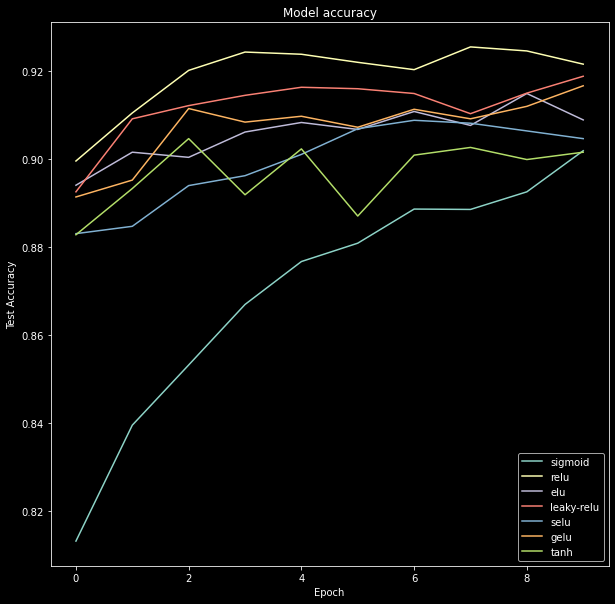

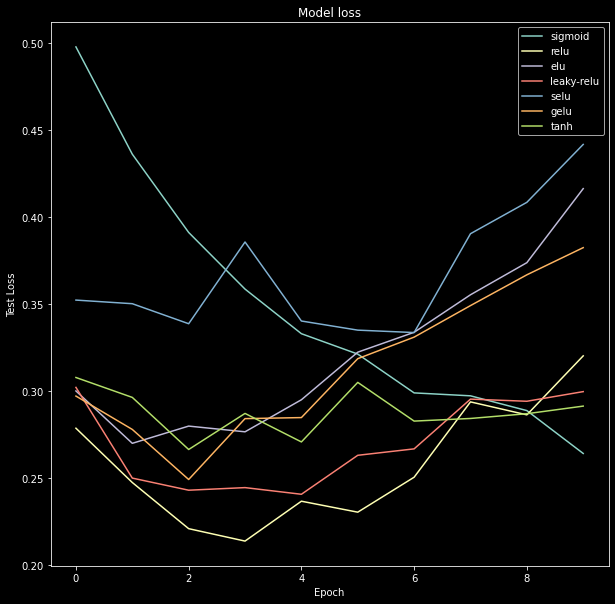

In [156]:
new_act_arr = act_func[0:]
new_results = result[0:]

def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for act_func in results:
        plt.plot(act_func.history['val_accuracy'])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(new_results, new_act_arr)

In [157]:
def build_ann(activation,
              dropout_rate,
              optimizer):
    model = Sequential()
    
    if(activation == 'selu'):
        model.add(Flatten())
        model.add(Dense(500, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        model.add(Dense(100, activation=activation, 
                        kernel_initializer='lecun_normal'))
        model.add(Dense(10, activation='sigmoid'))
    else:
          
        model.add(Flatten())
        model.add(Dense(500, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(100, activation=activation))
        model.add(Dense(10, activation='sigmoid'))
    
    model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [159]:
result = []

for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    
    model1 = build_ann(activation=activation,
                      dropout_rate=0.2,
                      optimizer='adam') 
    
    history = model1.fit(train_images_scaled, train_labels,
          validation_split=0.20,
          batch_size=128, # 128 is faster, but less accurate. 16/32 recommended
          epochs=20,
          verbose=1,
          validation_data=(test_images_scaled, test_labels))
    
    result.append(history)
    
    K.clear_session()
    del model1

print(result)


Training with -->sigmoid<-- activation function

Epoch 1/20
375/375 [==============================] - 6s 10ms/step - loss: 1.1941 - accuracy: 0.6211 - val_loss: 0.4973 - val_accuracy: 0.8212
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5035 - accuracy: 0.8178 - val_loss: 0.4339 - val_accuracy: 0.8393
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.4450 - accuracy: 0.8411 - val_loss: 0.4022 - val_accuracy: 0.8523
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.4023 - accuracy: 0.8543 - val_loss: 0.3787 - val_accuracy: 0.8628
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3887 - accuracy: 0.8590 - val_loss: 0.3756 - val_accuracy: 0.8637
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3724 - accuracy: 0.8632 - val_loss: 0.3645 - val_accuracy: 0.8658
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3606 - accuracy: 0.86

375/375 [==============================] - 3s 9ms/step - loss: 0.2720 - accuracy: 0.8965 - val_loss: 0.3109 - val_accuracy: 0.8869
Epoch 18/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2718 - accuracy: 0.8963 - val_loss: 0.3280 - val_accuracy: 0.8820
Epoch 19/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2636 - accuracy: 0.9027 - val_loss: 0.3089 - val_accuracy: 0.8878
Epoch 20/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2632 - accuracy: 0.8991 - val_loss: 0.3156 - val_accuracy: 0.8869

Training with -->leaky-relu<-- activation function

Epoch 1/20
375/375 [==============================] - 7s 11ms/step - loss: 0.7820 - accuracy: 0.7203 - val_loss: 0.4287 - val_accuracy: 0.8448
Epoch 2/20
375/375 [==============================] - 4s 9ms/step - loss: 0.4511 - accuracy: 0.8383 - val_loss: 0.4150 - val_accuracy: 0.8507
Epoch 3/20
375/375 [==============================] - 4s 9ms/step - loss: 0.4090 - accuracy: 0.8512 - 

375/375 [==============================] - 4s 10ms/step - loss: 0.2650 - accuracy: 0.9014 - val_loss: 0.2993 - val_accuracy: 0.8877
Epoch 14/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2655 - accuracy: 0.8979 - val_loss: 0.2981 - val_accuracy: 0.8892
Epoch 15/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2611 - accuracy: 0.9012 - val_loss: 0.2977 - val_accuracy: 0.8908
Epoch 16/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2498 - accuracy: 0.9061 - val_loss: 0.2880 - val_accuracy: 0.8926
Epoch 17/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2586 - accuracy: 0.9008 - val_loss: 0.2898 - val_accuracy: 0.8923
Epoch 18/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2426 - accuracy: 0.9061 - val_loss: 0.2941 - val_accuracy: 0.8923
Epoch 19/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2444 - accuracy: 0.9074 - val_loss: 0.2974 - val_accuracy: 0.8904
Epoc

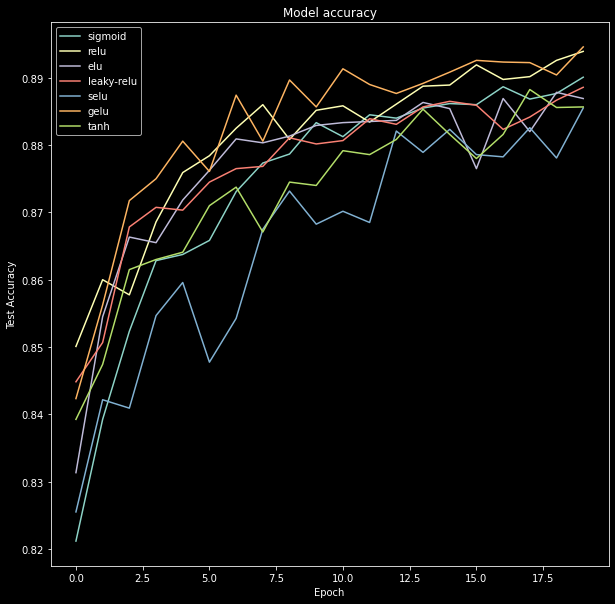

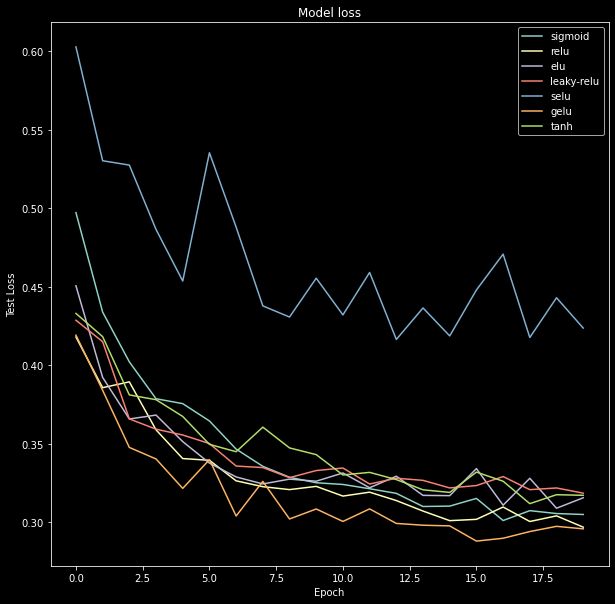

In [160]:
new_act_arr = act_func[0:]
new_results = result[0:]

def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for act_func in results:
        plt.plot(act_func.history['val_accuracy'])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(new_results, new_act_arr)

# Conclusion:
Though selection of activation function is depends on data and use case, our observations based on above testing is given below.

For CNN, Sigmoid/ Tanh functions are performing poor. ReLU outperforming others. Latest functions like ELU, SELU, GELU are giving similar results. For CNN, it is better to avoid Sigmoid and Tanh.

For ANN, All activation functions are performing good and give good results except SELU. Better to avoid using SELU during dense artificial neural network problems. Interesting thing is, Sigmoid/Tanh also performing good similar to other activation functions in our ANN Case.

However, we need to do similar type of analysis for RNN as well to understand activation functions better. We will update that use case test results soon.